<a href="https://colab.research.google.com/github/venidaydream/Data-Science/blob/main/Data_science_22_nov_1st_class__Country_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis en componentes principales ACP



1.   Subir los datos
2.   normalizamos
3. Ejecutar PCA
4. conocer la inercia retenida en los n-componentes
5. graficas original sobre el nuevo espacio
6. identificar a que corresponde cada componente
7. indice sintentico




In [10]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. subir los datos

In [4]:
df = pd.read_csv("/content/Country Risk 2019 Data.csv")
df

,Country,Abbrev,Corr,Peace,Legal,GDP Growth
0,Albania,AL,35,1.821,4.546,2.983
1,Algeria,DZ,35,2.219,4.435,2.553
2,Argentina,AR,45,1.989,5.087,-3.061
3,Armenia,AM,42,2.294,4.812,6.000
4,Australia,AU,77,1.419,8.363,1.713
...,...,...,...,...,...,...
116,Uruguay,UY,71,1.711,6.329,0.400
117,Vietnam,VI,37,1.877,5.084,6.500
118,Yemen,YE,15,3.369,2.671,2.113
119,Zambia,ZM,34,1.805,4.592,2.021


# 2. normalizamos

In [13]:
df.sort_values('Corr', ascending = False)

,Country,Abbrev,Corr,Peace,Legal,GDP Growth
28,Denmark,DK,87,1.316,8.174,1.698
76,New Zealand,NZ,87,1.221,8.514,2.506
35,Finland,FI,86,1.488,8.712,1.244
103,Switzerland,CH,85,1.375,8.571,0.761
96,Singapore,SG,85,1.347,8.462,0.546
...,...,...,...,...,...,...
77,Nicaragua,NI,22,2.312,4.337,-5.039
19,Chad,TD,20,2.522,3.886,2.284
16,Burundi,BI,19,2.520,3.798,0.419
27,Democratic Republic of Congo,CD,18,3.218,3.545,4.291


In [14]:
df.sort_values('Peace', ascending = False)

,Country,Abbrev,Corr,Peace,Legal,GDP Growth
118,Yemen,YE,15,3.369,2.671,2.113
27,Democratic Republic of Congo,CD,18,3.218,3.545,4.291
90,Russia,RU,28,3.093,4.989,1.084
81,Pakistan,PK,32,3.072,3.874,3.294
110,Turkey,TR,39,3.015,5.262,0.249
...,...,...,...,...,...,...
28,Denmark,DK,87,1.316,8.174,1.698
5,Austria,AT,77,1.291,8.089,1.605
87,Portugal,PT,62,1.274,6.976,1.913
76,New Zealand,NZ,87,1.221,8.514,2.506


In [15]:
df.sort_values('Legal', ascending = False)

,Country,Abbrev,Corr,Peace,Legal,GDP Growth
35,Finland,FI,86,1.488,8.712,1.244
103,Switzerland,CH,85,1.375,8.571,0.761
76,New Zealand,NZ,87,1.221,8.514,2.506
96,Singapore,SG,85,1.347,8.462,0.546
4,Australia,AU,77,1.419,8.363,1.713
...,...,...,...,...,...,...
78,Nigeria,NG,26,2.898,3.787,2.288
120,Zimbabwe,ZW,24,2.463,3.738,-7.077
27,Democratic Republic of Congo,CD,18,3.218,3.545,4.291
8,Bangladesh,BD,26,2.128,3.313,7.792


In [16]:
df.describe()

,Corr,Peace,Legal,GDP Growth
count,121.000000,121.000000,121.000000,121.000000
mean,46.842975,2.001017,5.752529,2.657529
std,18.702499,0.461485,1.373932,2.563741
min,15.000000,1.072000,2.671000,-9.459000
25%,33.000000,1.699000,4.785000,1.249000
50%,41.000000,1.939000,5.455000,2.600000
75%,60.000000,2.294000,6.488000,4.000000
max,87.000000,3.369000,8.712000,7.800000


In [22]:
features = ['Corr',	'Peace',	'Legal','GDP Growth']
identificadores = ['Country',	'Abbrev']

x=df.loc[:,features].values
y=df.loc[:,identificadores].values

In [27]:
x_normal = StandardScaler().fit_transform(x)
x_std=pd.DataFrame(data=x_normal,columns=features)
x_std

,Corr,Peace,Legal,GDP Growth
0,-0.635863,-0.391703,-0.881809,0.127479
1,-0.635863,0.474316,-0.962935,-0.040942
2,-0.098951,-0.026147,-0.486412,-2.239815
3,-0.260025,0.637511,-0.687399,1.309168
4,1.619164,-1.266426,1.907901,-0.369950
...,...,...,...,...
116,1.297018,-0.631055,0.421322,-0.884222
117,-0.528480,-0.269851,-0.488604,1.505007
118,-1.709685,2.976633,-2.252180,-0.213279
119,-0.689554,-0.426518,-0.848190,-0.249314


In [29]:
x_std.describe()

,Corr,Peace,Legal,GDP Growth
count,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02
mean,1.835079e-17,-5.780500e-16,-1.156100e-16,-1.504765e-16
std,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00
min,-1.709685e+00,-2.021472e+00,-2.252180e+00,-4.745764e+00
25%,-7.432448e-01,-6.571660e-01,-7.071327e-01,-5.516881e-01
50%,-3.137159e-01,-1.349435e-01,-2.174534e-01,-2.253275e-02
75%,7.064153e-01,6.375107e-01,5.375298e-01,5.258148e-01
max,2.156075e+00,2.976633e+00,2.162973e+00,2.014187e+00


# 3. Ejecutar PCA

hay 4 variables, cada una de 1, en total inertia es 4

In [ ]:
pca_x_4 = PCA(n_components=4)
pca_x_4_reduced = pca_x_4.fit_transform(x_std)
pca_x_4_reduced

# 4. conocer la inercia retenida en los n-componentes

In [39]:
variance = pca_x_4.explained_variance_
var_por=pca_x_4.explained_variance_ratio_

# Ejecutar PCA con 2 components

In [ ]:
pca_x_2=PCA(n_components=2)
pca_x_2_reduced = pca_x_2.fit_transform(x_std)
pca_x_2_reduced

In [43]:
variance2 = pca_x_2.explained_variance_
var_por2=pca_x_2.explained_variance_ratio_

# 5. graficas original sobre el nuevo espacio

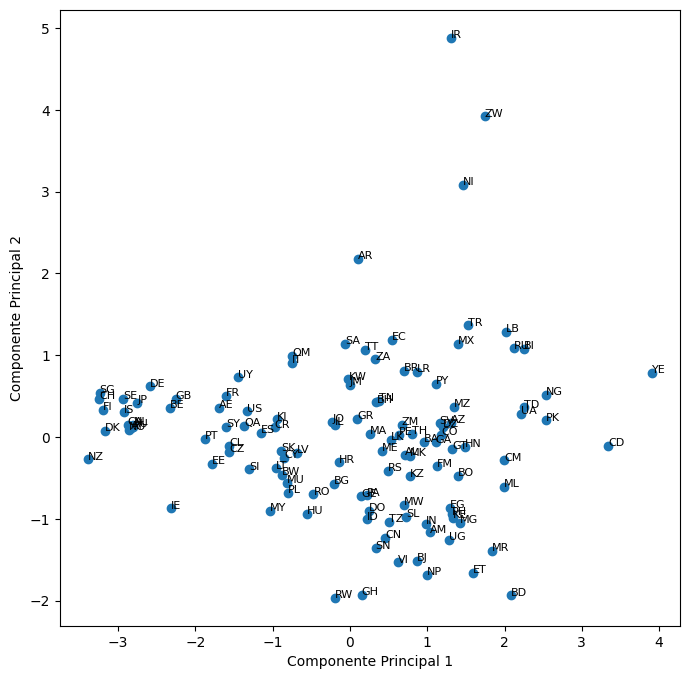

In [51]:
c1 = pca_x_2_reduced[:,0]
c2 = pca_x_2_reduced[:,1]
lab=df['Abbrev']
fig = plt.figure(figsize=(8,8))
plt.scatter(c1,c2)
for i, txt in enumerate(lab):
  plt.annotate(str(txt), (c1[i], c2[i]), fontsize=8)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()